## Introductory Overview

One of the metrics we chose to analyze is the data surrounding fatal accidental overdoses throughout different neighborhoods in Pittsburgh. With the drug crisis wreacking havoc on America in the way that it is, Pittsburgh in particular being hit hard by this, it is important to understand how each neighborhood is faring in the wake of this epidemic.

* NOTE: Make sure to upload the files 'fatal_data.csv' and 'zipcode_neighborhood_mapping_no_duplicates.csv' to the same directory as this notebook prior to running.

In [2]:
#connect your data folder and read data
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('fatal_data.csv')
zipcode_mapping = pd.read_csv('zipcode_neighborhood_mapping_no_duplicates.csv')

In [3]:
df

,_id,death_date_and_time,manner_of_death,age,sex,race,case_dispo,combined_od1,combined_od2,combined_od3,combined_od4,combined_od5,combined_od6,combined_od7,combined_od8,combined_od9,combined_od10,incident_zip,decedent_zip,case_year
0,7908196,2010-08-30T14:10:00,Accident,50,F,W,MO,Alprazolam,Amitriptyline,Tramadol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15229,NaN,2010
1,7908197,2010-08-31T22:08:00,Accident,54,M,B,MO,Alcohol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15214,NaN,2010
2,7908198,2010-09-26T20:38:00,Accident,44,M,W,MO,Carisoprodol,Cocaine,Oxycodone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15090,NaN,2010
3,7908199,2010-09-09T19:32:00,Accident,50,M,W,MO,Cocaine,Methylphenidate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15132,NaN,2010
4,7908200,2010-09-09T21:22:00,Accident,55,M,B,MO,Dextromethorphan,Morphine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15219,NaN,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7006,7915202,2020-01-14T04:11:00,Accident,38,M,W,MO,Fentanyl,Oxycodone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15701,NaN,2020
7007,7915203,2023-03-17T15:53:00,Accident,58,M,B,MO,Cocaine,Fentanyl,Alcohol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15132,NaN,2023
7008,7915204,2022-12-02T00:55:00,Accident,36,F,W,MO,Cocaine,Fentanyl,Methadone,Methamphetamine,Bromazolam,Phenylpropanolamine,NaN,NaN,NaN,NaN,15212,NaN,2022
7009,7915205,2022-12-03T20:20:00,Accident,55,M,W,MO,Fentanyl,Cocaine,Alcohol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15045,NaN,2022


In [4]:
zipcode_mapping['ZipCode'] = zipcode_mapping['ZipCode'].astype(str)
zipcode_mapping

,ZipCode,INCIDENTNEIGHBORHOOD
0,15213,Bloomfield
1,15205,Outside City
2,15238,Westwood
3,15212,East Allegheny
4,15205,Crafton Heights
...,...,...
1500,15221,Spring Hill-City View
1501,15220,Arlington
1502,15208,Bedford Dwellings
1503,15235,Beechview


The neighborhood with the fewest overdose deaths is Banksville with 15 deaths.


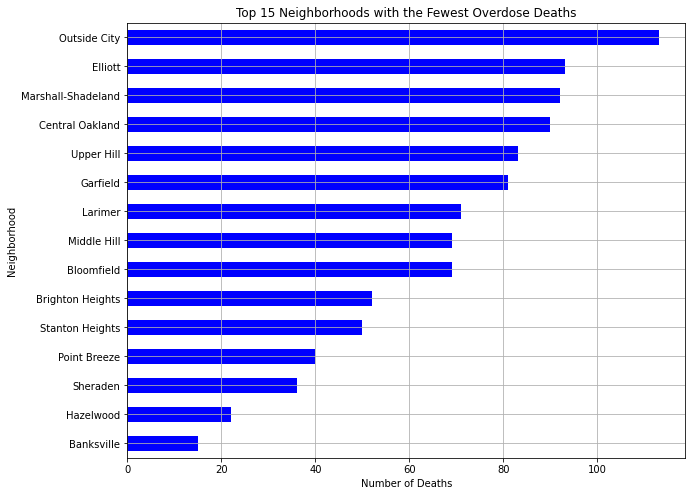

In [6]:
#df['incident_zip'] = df['incident_zip'].apply(lambda x: str(int(x)) if pd.notnull(x) and x != 'nan' else None)
zipcode_mapping['ZipCode'] = zipcode_mapping['ZipCode'].astype(str)
df['incident_zip'] = df['incident_zip'].astype(str)

# Filter the main dataframe to ensure correct zip code formatting
df = df[df['incident_zip'].notna() & df['incident_zip'].str.startswith('15') &
        (df['incident_zip'].str.len() == 5) & (df['incident_zip'].str.isdigit())]

zip_to_neighborhood = dict(zip(zipcode_mapping['ZipCode'], zipcode_mapping['INCIDENTNEIGHBORHOOD']))

# Map 'incident_zip' to the new neighborhood data
df['NEIGHBORHOOD'] = df['incident_zip'].map(zip_to_neighborhood)

# Remove entries that did not get any neighborhood assigned (i.e., incident_zip was not in mapping)
df = df.dropna(subset=['NEIGHBORHOOD'])

neighborhood_incident_counts = df['NEIGHBORHOOD'].value_counts()

fewest_deaths_neighborhood = neighborhood_incident_counts.idxmin()
fewest_deaths_count = neighborhood_incident_counts.min()

print(f"The neighborhood with the fewest overdose deaths is {fewest_deaths_neighborhood} with {fewest_deaths_count} deaths.")

# Plotting the neighborhoods with the least deaths, showing top 15 for better visualization
top_15_least_deaths_neighborhoods = neighborhood_incident_counts.nsmallest(15)
plt.figure(figsize=(10, 8))
top_15_least_deaths_neighborhoods.plot(kind='barh', color='blue')
plt.title('Top 15 Neighborhoods with the Fewest Overdose Deaths')
plt.xlabel('Number of Deaths')
plt.ylabel('Neighborhood')
plt.grid(True)
plt.show()

## Results and Conclusion

Based on this study, we can conclude that the neighborhood in which the drug crisis we are in has claimed the least lives is Banksville. While Banksville is far from the largest neighborhood in Pittsburgh, it is far from the smallest as well, which shows that its strong performance is not solely due to having a small population. Banksville has a higher median household income than the city as a whole and is considered one of the better areas to live in Pittsburgh (source: https://www.city-data.com/neighborhood/Banksville-Pittsburgh-PA.html), so it is safe to assume that the generally high standards of living within this area contribute to its residents facing less struggles with substances.

This metric is not being examined as a way of saying we should look down on those who struggle with substance abuse issues or places that have been hit particularly hard by this crisis. It is incredibly easy to slip into cycles of harmful behavioral patterns, especially when considering both the physical withdrawals and mental dependency that addicts face once they become addicted. However, it is still a sign of generally good living conditions when very few of a neighborhood's residents feel inclined to turn to substances. Thus, we can conclude that Banksville is the best neighborhood in Pittsburgh by purely this metric.